# Exploring the Meteoric Rise: Unveiling the Fastest Growing Private Companies and Startups Worldwide

In [3]:
#Importing the required libraries.
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt

## Requests Library:
The requests library in Python is used for making HTTP requests to web servers and interacting with web APIs. It provides a simple and elegant way to send HTTP requests and handle responses, making it a popular choice for web scraping, accessing web APIs, and performing various web-related tasks.

## BeautifulSoup:
Beautiful Soup is a Python library used for parsing HTML and XML documents, extracting information, and navigating the parsed tree structure. It's commonly used for web scraping tasks where you need to extract specific data from web pages. While Beautiful Soup is often used in conjunction with requests to fetch web pages, it's not directly used with Pandas.

However, you can use Beautiful Soup in combination with Pandas to extract data from HTML documents and then convert it into a DataFrame for further analysis. Here's a typical workflow:

- Use requests to fetch HTML content from a web page.
- Parse the HTML content using Beautiful Soup to create a BeautifulSoup object.
- Use Beautiful Soup methods to navigate the HTML structure and extract the desired data.
- Convert the extracted data into a Pandas DataFrame for analysis.

## Regular Expressions(re):
In Pandas, the re (regular expression) module is commonly used in combination with methods like str.contains(), str.match(), str.extract(), and str.replace() to perform various text processing and pattern matching operations on string columns in DataFrame.

## Matplotlib and Seaborn:
Matplotlib and Seaborn aare comprehensive libraries for creating static, interactive, and animated visualizations in Python. It provides a wide range of plotting functions and customization options, making it one of the most widely used libraries for data visualization in Python.

## Growjo Website
## Adding titles to data frame df

In [5]:
url="https://growjo.com/home/1"
page=requests.get(url)
page=BeautifulSoup(page.text)
table=page.find("table",class_="jss31 cstm-table")

title=table.find_all("th")
titles=[]
for i in title:
    titles.append(i.text)

In [6]:
df=pd.DataFrame(columns=titles)

In [7]:
df

,Rank,Company,City,Country,Funding,Industry,Employees,Revenue,Emp Growth %


## Adding rows to data frame

In [8]:

for i in range(1,201):
    url=f"https://growjo.com/home/{i}"
    
    page=requests.get(url)
    soup = BeautifulSoup(page.text, "html.parser")
    rows=soup.find_all("tr")
    
    for i in rows[1:51]:
        data=i.find_all("td")

        row=[i.text for i in data]
    
        l=len(df)
        df.loc[l]=row

In [11]:
df

,Rank,Company,City,Country,Funding,Industry,Employees,Revenue,Emp Growth %
0,1,Anthropic,San Francisco,USA,$4.51B,AI,573,$721.9M,323%
1,2,Figure,Silicon Valley,USA,$435M,Robotics,692,$28M,1333%
2,3,CoreWeave,New York City,USA,$1.22B,AI,782,$30M,177%
3,4,Hugging Face,New York City,USA,$400M,AI,333,$85.2M,42%
4,5,Shield AI,San Diego,USA,$930M,AI,645,$251.7M,12%
...,...,...,...,...,...,...,...,...,...
9942,9996,Taclia,Spain,,,Facilities,28,$4.7M,67%
9943,9997,reteach,Berlin,Germany,,E-Learning Pro...,28,$0,63%
9944,9998,Syntricate Tech...,Boston,USA,,Tech Services,28,$2.8M,69%
9945,9999,ExcelHealth Gro...,Nashville,USA,,Hospital/Healt...,28,$0,65%


In [ ]:
df.to_csv("10000.csv")

## Read csv file

In [38]:
df=pd.read_csv(r"C:\Users\chouk\Regex\10000.csv")

In [40]:
df

,Unnamed: 0,Rank,Company,City,Country,Funding,Industry,Employees,Revenue,Emp Growth %
0,0,1,Anthropic,San Francisco,USA,$4.51B,AI,573,$721.9M,323%
1,1,2,Figure,Silicon Valley,USA,$435M,Robotics,692,$28M,1333%
2,2,3,CoreWeave,New York City,USA,$1.22B,AI,343,$641M,214%
3,3,4,Hugging Face,New York City,USA,$400M,AI,333,$85.2M,42%
4,4,5,Shield AI,San Diego,USA,$930M,AI,645,$251.7M,12%
...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,Taclia,Spain,NaN,NaN,Facilities,28,$4.7M,67%
9996,9996,9997,reteach,Berlin,Germany,NaN,E-Learning Pro...,28,$0,63%
9997,9997,9998,Syntricate Tech...,Boston,USA,NaN,Tech Services,28,$2.8M,69%
9998,9998,9999,ExcelHealth Gro...,Nashville,USA,NaN,Hospital/Healt...,28,$0,65%


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   Rank          10000 non-null  int64 
 2   Company       10000 non-null  object
 3   City          9379 non-null   object
 4   Country       8190 non-null   object
 5   Funding       2027 non-null   object
 6   Industry      9979 non-null   object
 7   Employees     10000 non-null  int64 
 8   Revenue       10000 non-null  object
 9   Emp Growth %  10000 non-null  object
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


# DATA CLEANING

# Columns

##  Emp Growth %

In [42]:
df["Emp Growth %"]=df["Emp Growth %"].str.replace("%","").astype(float)  # removing % symbol

In [43]:
df

,Unnamed: 0,Rank,Company,City,Country,Funding,Industry,Employees,Revenue,Emp Growth %
0,0,1,Anthropic,San Francisco,USA,$4.51B,AI,573,$721.9M,323.0
1,1,2,Figure,Silicon Valley,USA,$435M,Robotics,692,$28M,1333.0
2,2,3,CoreWeave,New York City,USA,$1.22B,AI,343,$641M,214.0
3,3,4,Hugging Face,New York City,USA,$400M,AI,333,$85.2M,42.0
4,4,5,Shield AI,San Diego,USA,$930M,AI,645,$251.7M,12.0
...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,Taclia,Spain,NaN,NaN,Facilities,28,$4.7M,67.0
9996,9996,9997,reteach,Berlin,Germany,NaN,E-Learning Pro...,28,$0,63.0
9997,9997,9998,Syntricate Tech...,Boston,USA,NaN,Tech Services,28,$2.8M,69.0
9998,9998,9999,ExcelHealth Gro...,Nashville,USA,NaN,Hospital/Healt...,28,$0,65.0


## Revenue

In [44]:
df["Revenue"]=df["Revenue"].str.replace("M","")   # Removing M $ 

In [45]:
df["Revenue"]=df["Revenue"].str.replace("$","")

C:\Users\chouk\AppData\Local\Temp\ipykernel_21900\3062243950.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Revenue"]=df["Revenue"].str.replace("$","")


In [46]:
def convert_to_million(value):
    if value.endswith('B'):
        return float(value[:-1]) * 1000  # Convert billion to million
    elif value.endswith('m'):
        return float(value[:-1])  # Keep million as it is
    elif value.endswith('K'):
        return float(value[:-1]) / 1000
    elif value.endswith('k'):
        return float(value[:-1]) / 1000
    else:
        return float(value)

# Apply the function to the revenue column
df['Revenue'] = df['Revenue'].apply(convert_to_million)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10000 non-null  int64  
 1   Rank          10000 non-null  int64  
 2   Company       10000 non-null  object 
 3   City          9379 non-null   object 
 4   Country       8190 non-null   object 
 5   Funding       2027 non-null   object 
 6   Industry      9979 non-null   object 
 7   Employees     10000 non-null  int64  
 8   Revenue       10000 non-null  float64
 9   Emp Growth %  10000 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


In [48]:
df.rename(columns={'Revenue':'Revenue in M'},inplace=True)   # Changing column name Revenue to Revenue in M

In [49]:
df

,Unnamed: 0,Rank,Company,City,Country,Funding,Industry,Employees,Revenue in M,Emp Growth %
0,0,1,Anthropic,San Francisco,USA,$4.51B,AI,573,721.9,323.0
1,1,2,Figure,Silicon Valley,USA,$435M,Robotics,692,28.0,1333.0
2,2,3,CoreWeave,New York City,USA,$1.22B,AI,343,641.0,214.0
3,3,4,Hugging Face,New York City,USA,$400M,AI,333,85.2,42.0
4,4,5,Shield AI,San Diego,USA,$930M,AI,645,251.7,12.0
...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,Taclia,Spain,NaN,NaN,Facilities,28,4.7,67.0
9996,9996,9997,reteach,Berlin,Germany,NaN,E-Learning Pro...,28,0.0,63.0
9997,9997,9998,Syntricate Tech...,Boston,USA,NaN,Tech Services,28,2.8,69.0
9998,9998,9999,ExcelHealth Gro...,Nashville,USA,NaN,Hospital/Healt...,28,0.0,65.0


## Droping columns

In [50]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [51]:
 df.drop(['Funding'], axis=1,inplace=True)

In [52]:
df.sample(10)

,Rank,Company,City,Country,Industry,Employees,Revenue in M,Emp Growth %
5334,5335,Eurofase,Richmond Hill,CAN,Design,112,27.2,2.0
6466,6467,TerraGlen Resid...,Clonee,Ireland,Hospital/Healt...,32,0.0,88.0
9156,9157,QUALITY ENCLOSU...,Sarasota,USA,Materials,121,38.8,6.0
1953,1954,Satellite Vu,London,NaN,Technology,59,10.4,22.0
366,367,Kamar Pelajar,Stockholm,SWE,Travel Arrange...,467,0.0,358.0
3317,3318,Ferry.,NaN,NaN,Automotive,128,42.2,25.0
9104,9105,CEOX,Bend,USA,Executive Offi...,44,0.0,69.0
263,264,WK Kellogg Co,Battle Creek,USA,Food,960,362.9,685.0
8838,8839,KPMG Law LLP I...,Dublin,IE,Legal,41,8.9,75.0
5522,5523,Ambl.,Moorgate,NaN,Hospitality,23,2.9,29.0


In [53]:
df

,Rank,Company,City,Country,Industry,Employees,Revenue in M,Emp Growth %
0,1,Anthropic,San Francisco,USA,AI,573,721.9,323.0
1,2,Figure,Silicon Valley,USA,Robotics,692,28.0,1333.0
2,3,CoreWeave,New York City,USA,AI,343,641.0,214.0
3,4,Hugging Face,New York City,USA,AI,333,85.2,42.0
4,5,Shield AI,San Diego,USA,AI,645,251.7,12.0
...,...,...,...,...,...,...,...,...
9995,9996,Taclia,Spain,NaN,Facilities,28,4.7,67.0
9996,9997,reteach,Berlin,Germany,E-Learning Pro...,28,0.0,63.0
9997,9998,Syntricate Tech...,Boston,USA,Tech Services,28,2.8,69.0
9998,9999,ExcelHealth Gro...,Nashville,USA,Hospital/Healt...,28,0.0,65.0


## Country

In [54]:
df['Country'].unique()

array(['USA', 'CAN', 'United Arab Emirates', 'UK', 'Cayman Islands',
       'Israel', 'Ger', 'Brazil', 'Netherlands', 'Germany', 'South Korea',
       'Egypt', 'FI', 'SGP', 'France', 'Nigeria', 'Ireland', 'IND',
       'China', 'Hong Kong', 'Cyprus', 'Fra', 'Uzbekistan', 'SWE', nan,
       'New Zealand', 'Denmark', 'Liechtenstein', 'aus', 'Spain', 'ind',
       'Ind', 'fin', 'Aus', 'Norway', 'FRA', 'Canada', 'bel', 'Chile',
       'POL', 'uk', 'net', 'Grenada', 'South Africa', 'Guernsey', 'IRE',
       'Unknown', 'fra', 'Belgium', 'Australia', 'Sa', 'Poland', 'GEN',
       'Sweden', 'Ire', 'Luxembourg', 'Austria', 'Portugal',
       'Switzerland', 'SWI', 'israel', 'NET', 'ger', 'AUS',
       'United State', 'Italy', 'Finland', 'pol', 'IN', 'Bel', 'SPA',
       'Philippines', 'IE', 'AR', 'FIN', 'AU', 'Seychelles', 'Isr', 'Swi',
       'Fin', 'sa', 'Por', 'DEN', 'Indonesia', 'POR', 'swi', 'Pol', 'UAE',
       'ISR', 'Den', 'austria', 'Net', 'spa', 'Georgia', 'BEL', 'Belarus',
       'SA'

In [55]:
country_mapping = {
    'USA': 'USA',
    'United States': 'USA',
    'United States of America': 'USA',
    'CAN': 'Canada',
    'United Arab Emirates': 'UAE',
    'UK': 'United Kingdom',
    'Cayman Islands': 'Cayman Islands',
    'Israel': 'Israel',
    'Ger': 'Germany',
    'Brazil': 'Brazil',
    'Netherlands': 'Netherlands',
    'Net': 'Netherlands',
    'Germany': 'Germany',
    'South Korea': 'South Korea',
    'Egypt': 'Egypt',
    'FI': 'Finland',
    'SGP': 'Singapore',
    'France': 'France',
    'Nigeria': 'Nigeria',
    'Ireland': 'Ireland',
    'IND': 'India',
    'China': 'China',
    'Hong Kong': 'Hong Kong',
    'Cyprus': 'Cyprus',
    'Fra': 'France',
    'Uzbekistan': 'Uzbekistan',
    'SWE': 'Sweden',
    'New Zealand': 'New Zealand',
    'Denmark': 'Denmark',
    'Den': 'Denmark',
    'Liechtenstein': 'Liechtenstein',
    'aus': 'Australia',
    'Spain': 'Spain',
    'ind': 'India',
    'Ind': 'India',
    'fin': 'Finland',
    'Fin': 'Finland',
    'Aus': 'Australia',
    'Norway': 'Norway',
    'FRA': 'France',
    'Canada': 'Canada',
    'bel': 'Belgium',
    'Chile': 'Chile',
    'POL': 'Poland',
    'uk': 'United Kingdom',
    'net': 'Netherlands',
    'Grenada': 'Grenada',
    'South Africa': 'South Africa',
    'Guernsey': 'Guernsey',
    'IRE': 'Ireland',
    'Unknown': 'Unknown',
    'fra': 'France',
    'Belgium': 'Belgium',
    'Australia': 'Australia',
    'Sa': 'Saudi Arabia',
    'Poland': 'Poland',
    'GEN': 'Germany',
    'Sweden': 'Sweden',
    'Ire': 'Ireland',
    'Luxembourg': 'Luxembourg',
    'Austria': 'Austria',
    'Portugal': 'Portugal',
    'Switzerland': 'Switzerland',
    'SWI': 'Switzerland',
    'israel': 'Israel',
    'NET': 'Netherlands',
    'ger': 'Germany',
    'AUS': 'Australia',
    'United State': 'USA',
    'Italy': 'Italy',
    'Finland': 'Finland',
    'pol': 'Poland',
    'Pol': 'Poland',
    'IN': 'India',
    'Bel': 'Belgium',
    'SPA': 'Spain',
    'Philippines': 'Philippines',
    'IE': 'Ireland',
    'AR': 'Argentina',
    'FIN': 'Finland',
    'AU': 'Australia',
    'Seychelles': 'Seychelles',
    'Isr': 'Israel',
    'Swi': 'Switzerland',
    'sa': 'Saudi Arabia',
    'Por': 'Portugal',
    'DEN': 'Denmark',
    'Indonesia': 'Indonesia',
    'POR': 'Portugal',
    'swi': 'Switzerland',
    'UAE': 'UAE',
    'ISR': 'Israel',
    'austria': 'Austria',
    'spa': 'Spain',
    'Georgia': 'Georgia',
    'BEL': 'Belgium',
    'Belarus': 'Belarus',
    'SA': 'Saudi Arabia',
    'England': 'United Kingdom',
    'ire': 'Ireland',
    'isr': 'Israel'
}


df['Country'] = df['Country'].replace(country_mapping)




In [56]:
df['Country'].unique()

array(['USA', 'Canada', 'UAE', 'United Kingdom', 'Cayman Islands',
       'Israel', 'Germany', 'Brazil', 'Netherlands', 'South Korea',
       'Egypt', 'Finland', 'Singapore', 'France', 'Nigeria', 'Ireland',
       'India', 'China', 'Hong Kong', 'Cyprus', 'Uzbekistan', 'Sweden',
       nan, 'New Zealand', 'Denmark', 'Liechtenstein', 'Australia',
       'Spain', 'Norway', 'Belgium', 'Chile', 'Poland', 'Grenada',
       'South Africa', 'Guernsey', 'Unknown', 'Saudi Arabia',
       'Luxembourg', 'Austria', 'Portugal', 'Switzerland', 'Italy',
       'Philippines', 'Argentina', 'Seychelles', 'Indonesia', 'Georgia',
       'Belarus'], dtype=object)

## Industry

In [57]:
df['Industry'].unique()

array(['AI', 'Robotics', 'Fintech', 'Automotive', 'Analytics', 'Hardware',
       'Environmental', 'SaaS', 'Insurance', 'DevOps', 'Mining',
       'Semiconductors', 'Tech Services', 'HRTech', 'IT Security',
       'Adtech', 'Hospital/Healt...', 'Wireless', 'Aviation', 'LegalTech',
       'Finance', 'Energy', 'eCommerceTech', 'Food', 'Software', 'Gaming',
       'Apparel', 'Consumer', 'Telecom', 'Business Intel...',
       'Networking', 'Real Estate Te...', 'Digital Health',
       'Computer and N...', 'VR', 'Healthcare', 'HR', 'Blockchain',
       'Cloud', 'Research Servi...', 'Electronics', 'Accounting',
       'Chemical Manuf...', 'Research', 'Real Estate', 'Energy/Oil',
       'Hospitality', 'eCommerce', '3D', 'Computers and ...',
       'Industrial', 'Education', 'Construction', 'Casinos', 'Marketing',
       'Advertising', 'Transportation', 'Technology', 'AdTech',
       'Maritime', 'Retail Health ...', 'Utilities', 'Events', 'Defense',
       'Consulting', 'Media', 'Information T

In [58]:
# Mapping dictionary for categorizing industries
industry_mapping = {
    'AI': 'Technology',
    'Robotics': 'Technology',
    'Fintech': 'Finance',
    'Automotive': 'Automotive',
    'Analytics': 'Technology',
    'Hardware': 'Technology',
    'Environmental': 'Environment',
    'SaaS': 'Technology',
    'Insurance': 'Finance',
    'DevOps': 'Technology',
    'Mining': 'Mining',
    'Semiconductors': 'Technology',
    'Tech Services': 'Technology',
    'HRTech': 'Technology',
    'IT Security': 'Technology',
    'Adtech': 'Technology',
    'Hospital/Healt...': 'Healthcare',
    'Wireless': 'Technology',
    'Aviation': 'Aviation',
    'LegalTech': 'Legal',
    'Finance': 'Finance',
    'Energy': 'Energy',
    'eCommerceTech': 'Technology',
    'Food': 'Food',
    'Software': 'Technology',
    'Gaming': 'Gaming',
    'Apparel': 'Consumer Goods',
    'Consumer': 'Consumer Goods',
    'Telecom': 'Technology',
    'Business Intel...': 'Technology',
    'Networking': 'Technology',
    'Real Estate Te...': 'Real Estate',
    'Digital Health': 'Healthcare',
    'Computer and N...': 'Technology',
    'VR': 'Technology',
    'Healthcare': 'Healthcare',
    'HR': 'Human Resources',
    'Blockchain': 'Technology',
    'Cloud': 'Technology',
    'Research Servi...': 'Research',
    'Electronics': 'Technology',
    'Accounting': 'Finance',
    'Chemical Manuf...': 'Chemicals',
    'Research': 'Research',
    'Real Estate': 'Real Estate',
    'Energy/Oil': 'Energy',
    'Hospitality': 'Hospitality',
    'eCommerce': 'eCommerce',
    '3D': 'Technology',
    'Computers and ...': 'Technology',
    'Industrial': 'Industrial',
    'Education': 'Education',
    'Construction': 'Construction',
    'Casinos': 'Entertainment',
    'Marketing': 'Marketing',
    'Advertising': 'Advertising',
    'Transportation': 'Transportation',
    'AdTech': 'Technology',
    'Maritime': 'Maritime',
    'Retail Health ...': 'Retail',
    'Utilities': 'Utilities',
    'Events': 'Events',
    'Defense': 'Defense',
    'Consulting': 'Consulting',
    'Media': 'Media',
    'Information Te...': 'Technology',
    'Investments': 'Finance',
    'Martech': 'Technology',
    'Medical Equip': 'Medical',
    'Security': 'Security',
    'Farming': 'Farming',
    'DeliveryTech': 'Technology',
    'EdTech': 'Education',
    'Restaurants': 'Food',
    'Legaltech': 'Legal',
    'Foodtech': 'Food',
    'E-Learning Pro...': 'Education',
    'Engineering': 'Engineering',
    'Services for R...': 'Services',
    'Entertainment': 'Entertainment',
    'Cosmetics': 'Beauty',
    'BabyTech': 'Technology',
    'Travel Arrange...': 'Travel',
    'Sports': 'Sports',
    'Medical': 'Medical',
    'Design': 'Design',
    'Outsourcing an...': 'Services',
    'Outsource': 'Services',
    'Aviatioon': 'Aviation',
    'Manufacturing': 'Manufacturing',
    'Wholesale Buil...': 'Wholesale',
    'Chemicals': 'Chemicals',
    'Recruiting': 'Human Resources',
    'Pharma': 'Pharmaceuticals',
    'Retail': 'Retail',
    'Supplies': 'Supplies',
    'Health': 'Healthcare',
    'Logistics': 'Logistics',
    'Technology, In...': 'Technology',
    'Executive': 'Executive',
    'Oil and Gas': 'Energy',
    'Biotech': 'Biotechnology',
    'Veterinary': 'Veterinary',
    'Social Service...': 'Social Services',
    'IoT': 'Technology',
    'Furniture and ...': 'Furniture',
    'Investment Ban...': 'Finance',
    'Facilities': 'Facilities',
    'Think Tanks': 'Research',
    'NonProfit': 'Nonprofit',
    'Recreation': 'Recreation',
    'ProductivityTe...': 'Technology',
    'Leisure': 'Recreation',
    'Health, Wellne...': 'Healthcare',
    'Machinery': 'Machinery',
    'Materials': 'Materials',
    'Cannabis': 'Cannabis',
    'Nonprofit': 'Nonprofit',
    'Legal': 'Legal',
    'Clean Tech': 'Technology',
    'Printing Servi...': 'Printing',
    'Leasing Real E...': 'Real Estate',
    'Medical Office...': 'Medical',
    'Professional T...': 'Professional Services',
    'HRtech': 'Human Resources',
    'Support/CRM Te...': 'Technology',
    'Gambling Facil...': 'Entertainment',
    'Banking': 'Finance',
    'Publishing': 'Publishing',
    'Airlines and A...': 'Aviation',
    'Plastics': 'Plastics',
    'Fitness': 'Fitness',
    'Venture Capita...': 'Finance',
    'Spectator Spor...': 'Sports',
    'Cryptocurrency': 'Cryptocurrency',
    'Music': 'Music',
    'Computer Netwo...': 'Technology',
    'Trucking': 'Transportation',
    'Retail Luxury ...': 'Retail',
    'Event Tech': 'Events',
    'Design Service...': 'Design',
    'Religious': 'Religious',
    'Technology and...': 'Technology',
    'Supermarkets': 'Retail',
    'Beverages': 'Food',
    'Training': 'Education',
    'Packaging': 'Packaging',
    'Solar Electric...': 'Energy',
    'Health and Hum...': 'Healthcare',
    'Marketing Serv...': 'Marketing',
    'Fundraising': 'Fundraising',
    'Fund-Raising': 'Fundraising',
    'Learning': 'Education',
    'Trade': 'Trade',
    'Newspaper Publ...': 'Publishing',
    'Philanthropy': 'Philanthropy',
    'Defense and Sp...': 'Defense',
    'Wholesale': 'Wholesale',
    'Automation Mac...': 'Automation',
    'Packaging and ...': 'Packaging',
    'Sports and Rec...': 'Sports',
    'Business Skill...': 'Business',
    'Space Research...': 'Research',
    'Blogs': 'Media',
    'AnimaciÃ³n y po...': 'Entertainment',
    'IT System Data...': 'Technology',
    'Writing': 'Writing',
    'Textile Manufa...': 'Textiles',
    'Rail Transport...': 'Transportation',
    'Freight and Pa...': 'Transportation',
    'Primary and Se...': 'Education',
    'PR/Comm': 'Public Relations',
    'Movies': 'Entertainment',
    'Renewable Ener...': 'Energy',
    'Medical Device': 'Medical',
    'Electrical Equ...': 'Electrical',
    'Veterinary Ser...': 'Veterinary',
    'Technology & S...': 'Technology',
    'Civil': 'Civil Engineering',
    'Civic and Soci...': 'Society',
    'Book and Perio...': 'Publishing',
    'Musicians': 'Music',
    'Personal Care ...': 'Personal Care',
    'Salestech': 'Technology',
    'Government Rel...': 'Government',
    'Warehousing': 'Logistics',
    'Retail Groceri...': 'Retail',
    'Electric Power...': 'Energy',
    'Movies, Videos...': 'Entertainment',
    'Home Health Ca...': 'Healthcare',
    'Wireless Servi...': 'Technology',
    'Individual and...': 'Individual',
    'Professional S...': 'Professional Services',
    'Executive Offi...': 'Executive',
    'Libraries': 'Libraries',
    'Furniture': 'Furniture',
    'Medical Practi...': 'Medical',
    'Broadcast Medi...': 'Media',
    'Security Syste...': 'Security',
    'Mobile Games': 'Gaming',
    'Blockchain Ser...': 'Blockchain',
    'Translation': 'Translation',
    'Non-profit Org...': 'Nonprofit',
    'FinTech': 'Finance',
    'Printing': 'Printing',
    'Architecture a...': 'Architecture',
    'Paper': 'Paper',
    'Political Orga...': 'Politics',
    'ResebyrÃ¥er': 'Research',
    'Architecture': 'Architecture',
    'Nanotechnology...': 'Technology',
    'Business Conte...': 'Business',
    'Agriculture, C...': 'Agriculture',
    'Data Infrastru...': 'Technology',
    'Retail Office ...': 'Retail',
    'Administration...': 'Administration',
    'Lending': 'Finance',
    'Sports Teams a...': 'Sports',
    'Paper and Fore...': 'Paper',
    'Retail Gasolin...': 'Retail',
    'Online Audio a...': 'Media',
    'Animation': 'Entertainment',
    'Semiconductor ...': 'Technology',
    'Commercial and...': 'Commercial',
    'Mobile App Dev...': 'Technology',
    'Nursing Homes ...': 'Healthcare',
    'Law': 'Legal',
    'Fabricated Met...': 'Metals',
    'Computer Hardw...': 'Technology',
    'Program Dev': 'Technology',
    'Museums': 'Museums',
    'Tobacco': 'Tobacco',
    'Warehousing an...': 'Logistics',
    'Baked Goods Ma...': 'Food',
    'Philanthropic ...': 'Philanthropy',
    'Armed Forces': 'Military',
    'Staffing & Rec...': 'Human Resources',
    'Textiles': 'Textiles',
    'Beverage Manuf...': 'Food',
    'Engineering Se...': 'Engineering',
    'Telephone Call...': 'Telecommunications',
    'Repair and Mai...': 'Repair',
    'Administrative...': 'Administration',
    'Dairy': 'Food',
    'Shipbuilding': 'Shipbuilding',
    'Military': 'Military',
    'Privately Held': 'Private',
    'Pet Services': 'Pets',
    'Landscaping Se...': 'Landscaping',
    'Public Relatio...': 'Public Relations',
    'Movies and Sou...': 'Entertainment',
    'Mobile Gaming ...': 'Gaming',
    'Animation and ...': 'Entertainment',
    'Arts': 'Arts',
    'Railroad Equip...': 'Transportation',
    'Staffing': 'Human Resources',
    'Museums, Histo...': 'Museums',
    'Paint, Coating...': 'Manufacturing',
    'Urban Transit ...': 'Transportation',
    'Embedded Softw...': 'Technology',
    'Medical and Di...': 'Medical',
    'Economic Progr...': 'Economy',
    'Security Guard...': 'Security',
    'Social Network...': 'Social Media',
    'Govtech': 'Government',
    'Recreational F...': 'Recreation',
    'Concreate': 'Construction',
    'Ground Passeng...': 'Transportation',
    'Wineries': 'Food',
    'Legislative Of...': 'Government',
    'Internet Marke...': 'Marketing',
    'Media and Tele...': 'Media',
    'Retail Art Sup...': 'Retail',
    'Sporting Goods...': 'Sports',
    'Public Policy ...': 'Politics',
    'Holding Compan...': 'Holding',
    'Maritime Trans...': 'Maritime',
    'Newspapers': 'Media',
    'Food and Bever...': 'Food',
    'Community Serv...': 'Community',
    'Fisheries': 'Fisheries',
    'Plastics Manuf...': 'Plastics',
    'Artists and Wr...': 'Arts',
    'IT System Desi...': 'Technology',
    'Water, Waste, ...': 'Environment',
    'Leasing Non-re...': 'Real Estate',
    'Wholesale Impo...': 'Wholesale',
    'Vehicle Repair...': 'Automotive',
    'Wind Electric ...': 'Energy',
    'Performing Art...': 'Arts',
    'Retail Motor V...': 'Retail',
    'Radio and Tele...': 'Media',
    'Wholesale Moto...': 'Wholesale',
    'Dentists': 'Dentistry',
    'Strategic Mana...': 'Management',
    'Robot Manufact...': 'Robotics',
    'Judiciary': 'Law',
    'Real Estate Ag...': 'Real Estate',
    'Insurance Agen...': 'Insurance',
    'Online and Mai...': 'Online',
    'Logistics & Su...': 'Logistics',
    'Mobile Computi...': 'Technology',
    'Insurance Carr...': 'Insurance',
    'Professional O...': 'Professional Services',
    'Real Estate an...': 'Real Estate',
    'Climate Data a...': 'Environment',
    'Hotels and Mot...': 'Hospitality',
    'Book Publishin...': 'Publishing',
    'Climate Techno...': 'Environment'
}

# Map industries to categories
df['Industry'] = df['Industry'].map(industry_mapping)



In [59]:
df['Industry'].unique()

array(['Technology', 'Finance', 'Automotive', 'Environment', 'Mining',
       'Healthcare', 'Aviation', 'Legal', 'Energy', 'Food', 'Gaming',
       'Consumer Goods', 'Real Estate', 'Human Resources', 'Research',
       'Chemicals', 'Hospitality', 'eCommerce', 'Industrial', 'Education',
       'Construction', 'Entertainment', 'Marketing', 'Advertising',
       'Transportation', nan, 'Maritime', 'Retail', 'Utilities', 'Events',
       'Defense', 'Consulting', 'Media', 'Medical', 'Security', 'Farming',
       'Engineering', 'Services', 'Beauty', 'Travel', 'Sports', 'Design',
       'Manufacturing', 'Wholesale', 'Pharmaceuticals', 'Supplies',
       'Logistics', 'Executive', 'Biotechnology', 'Veterinary',
       'Social Services', 'Furniture', 'Facilities', 'Nonprofit',
       'Recreation', 'Machinery', 'Materials', 'Cannabis', 'Printing',
       'Professional Services', 'Publishing', 'Plastics', 'Fitness',
       'Cryptocurrency', 'Music', 'Religious', 'Packaging', 'Fundraising',
       '

In [60]:
df

,Rank,Company,City,Country,Industry,Employees,Revenue in M,Emp Growth %
0,1,Anthropic,San Francisco,USA,Technology,573,721.9,323.0
1,2,Figure,Silicon Valley,USA,Technology,692,28.0,1333.0
2,3,CoreWeave,New York City,USA,Technology,343,641.0,214.0
3,4,Hugging Face,New York City,USA,Technology,333,85.2,42.0
4,5,Shield AI,San Diego,USA,Technology,645,251.7,12.0
...,...,...,...,...,...,...,...,...
9995,9996,Taclia,Spain,NaN,Facilities,28,4.7,67.0
9996,9997,reteach,Berlin,Germany,Education,28,0.0,63.0
9997,9998,Syntricate Tech...,Boston,USA,Technology,28,2.8,69.0
9998,9999,ExcelHealth Gro...,Nashville,USA,Healthcare,28,0.0,65.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          10000 non-null  int64  
 1   Company       10000 non-null  object 
 2   City          9379 non-null   object 
 3   Country       8190 non-null   object 
 4   Industry      9919 non-null   object 
 5   Employees     10000 non-null  int64  
 6   Revenue in M  10000 non-null  float64
 7   Emp Growth %  10000 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB


In [62]:
df1=df

In [63]:
df1

,Rank,Company,City,Country,Industry,Employees,Revenue in M,Emp Growth %
0,1,Anthropic,San Francisco,USA,Technology,573,721.9,323.0
1,2,Figure,Silicon Valley,USA,Technology,692,28.0,1333.0
2,3,CoreWeave,New York City,USA,Technology,343,641.0,214.0
3,4,Hugging Face,New York City,USA,Technology,333,85.2,42.0
4,5,Shield AI,San Diego,USA,Technology,645,251.7,12.0
...,...,...,...,...,...,...,...,...
9995,9996,Taclia,Spain,NaN,Facilities,28,4.7,67.0
9996,9997,reteach,Berlin,Germany,Education,28,0.0,63.0
9997,9998,Syntricate Tech...,Boston,USA,Technology,28,2.8,69.0
9998,9999,ExcelHealth Gro...,Nashville,USA,Healthcare,28,0.0,65.0


## Dropping unknown country values

In [64]:
df=df.drop(df[df['Country']=='Unknown'].index)

In [65]:
df[df["Country"]=='Unknown']

,Rank,Company,City,Country,Industry,Employees,Revenue in M,Emp Growth %


## Droping rows which have no City values

In [69]:
column_name = 'City'  # Change this to your column name
df.dropna(subset=[column_name], inplace=True)

## Droping rows which have no Industry values

In [73]:
column_name = 'Industry'  # Change this to your column name
df.dropna(subset=[column_name], inplace=True)

## Droping rows which have no Country values

In [76]:
column_name = 'Country'  # Change this to your column name
df.dropna(subset=[column_name], inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7850 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          7850 non-null   int64  
 1   Company       7850 non-null   object 
 2   City          7850 non-null   object 
 3   Country       7850 non-null   object 
 4   Industry      7850 non-null   object 
 5   Employees     7850 non-null   int64  
 6   Revenue in M  7850 non-null   float64
 7   Emp Growth %  7850 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 552.0+ KB


In [ ]:
df.to_csv("eda project.csv")

In [4]:
df=pd.read_csv(r"C:\Users\chouk\eda project.csv")

In [5]:
df

,Unnamed: 0,Rank,Company,City,Country,Industry,Employees,Revenue in M,Emp Growth %
0,0,1,Anthropic,San Francisco,USA,Technology,573,721.9,323.0
1,1,2,Figure,Silicon Valley,USA,Technology,692,28.0,1333.0
2,2,3,CoreWeave,New York City,USA,Technology,343,641.0,214.0
3,3,4,Hugging Face,New York City,USA,Technology,333,85.2,42.0
4,4,5,Shield AI,San Diego,USA,Technology,645,251.7,12.0
...,...,...,...,...,...,...,...,...,...
7845,9994,9995,University of T...,Oak Ridge,USA,Research,28,0.0,65.0
7846,9996,9997,reteach,Berlin,Germany,Education,28,0.0,63.0
7847,9997,9998,Syntricate Tech...,Boston,USA,Technology,28,2.8,69.0
7848,9998,9999,ExcelHealth Gro...,Nashville,USA,Healthcare,28,0.0,65.0


In [8]:
df['City'] = df['City'].replace('India', 'Hyderabad')

In [9]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

# DATA EXPLORATION

In [85]:
df

,Rank,Company,City,Country,Industry,Employees,Revenue in M,Emp Growth %
0,1,Anthropic,San Francisco,USA,Technology,573,721.9,323.0
1,2,Figure,Silicon Valley,USA,Technology,692,28.0,1333.0
2,3,CoreWeave,New York City,USA,Technology,343,641.0,214.0
3,4,Hugging Face,New York City,USA,Technology,333,85.2,42.0
4,5,Shield AI,San Diego,USA,Technology,645,251.7,12.0
...,...,...,...,...,...,...,...,...
7845,9995,University of T...,Oak Ridge,USA,Research,28,0.0,65.0
7846,9997,reteach,Berlin,Germany,Education,28,0.0,63.0
7847,9998,Syntricate Tech...,Boston,USA,Technology,28,2.8,69.0
7848,9999,ExcelHealth Gro...,Nashville,USA,Healthcare,28,0.0,65.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7850 entries, 0 to 7849
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          7850 non-null   int64  
 1   Company       7850 non-null   object 
 2   City          7850 non-null   object 
 3   Country       7850 non-null   object 
 4   Industry      7850 non-null   object 
 5   Employees     7850 non-null   int64  
 6   Revenue in M  7850 non-null   float64
 7   Emp Growth %  7850 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 490.8+ KB


In [132]:
df.describe()

,Rank,Employees,Revenue in M,Emp Growth %
count,7850.000000,7850.000000,7850.000000,7850.000000
mean,4987.852229,176.640000,80.916506,51.530955
std,2950.384907,198.358672,2531.968580,53.554003
min,1.000000,17.000000,0.000000,0.000000
25%,2464.250000,44.000000,4.900000,13.250000
50%,4941.000000,86.000000,13.400000,43.000000
75%,7600.750000,238.000000,42.200000,75.000000
max,10000.000000,998.000000,220200.000000,1333.000000


# VISUALIZATION

# Univariate analysis

In [87]:
df['Revenue in M'].describe()

count      7850.000000
mean         80.916506
std        2531.968580
min           0.000000
25%           4.900000
50%          13.400000
75%          42.200000
max      220200.000000
Name: Revenue in M, dtype: float64

In [88]:
df['Employees'].describe()

count    7850.000000
mean      176.640000
std       198.358672
min        17.000000
25%        44.000000
50%        86.000000
75%       238.000000
max       998.000000
Name: Employees, dtype: float64

In [89]:
df['Emp Growth %'].describe()

count    7850.000000
mean       51.530955
std        53.554003
min         0.000000
25%        13.250000
50%        43.000000
75%        75.000000
max      1333.000000
Name: Emp Growth %, dtype: float64

In [143]:
a=df['Country'].value_counts().head(5)
a.index

Index(['USA', 'United Kingdom', 'Canada', 'India', 'Germany'], dtype='object')

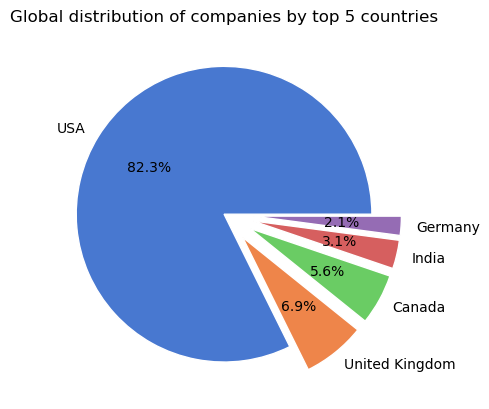

In [147]:
sns.set_palette("muted")
plt.pie(df['Country'].value_counts().head(5),autopct='%0.1f%%',labels=a.index,wedgeprops={'linewidth':1,'edgecolor':'white'},explode=[0,0.2,0.2,0.2,0.2])
plt.title("Global distribution of companies by top 5 countries")
plt.show()

In [6]:
a=df['Industry'].value_counts().head(5)
a.index

Index(['Technology', 'Finance', 'Healthcare', 'Education', 'Biotechnology'], dtype='object')

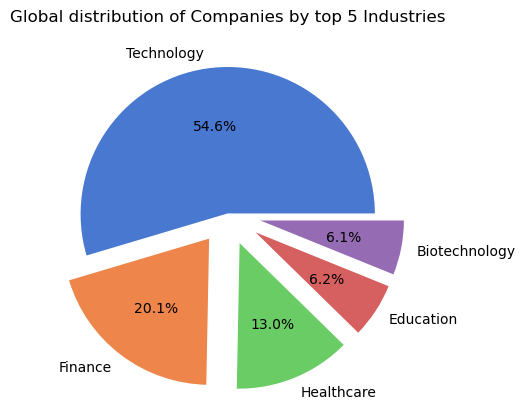

In [7]:
sns.set_palette("muted")
plt.pie(df['Industry'].value_counts().head(5),autopct='%0.1f%%',labels=a.index,wedgeprops={'linewidth':1,'edgecolor':'white'},explode=[0,0.2,0.2,0.2,0.2])
plt.title("Global distribution of Companies by top 5 Industries")
plt.show()

## Violin Plot of Employees:

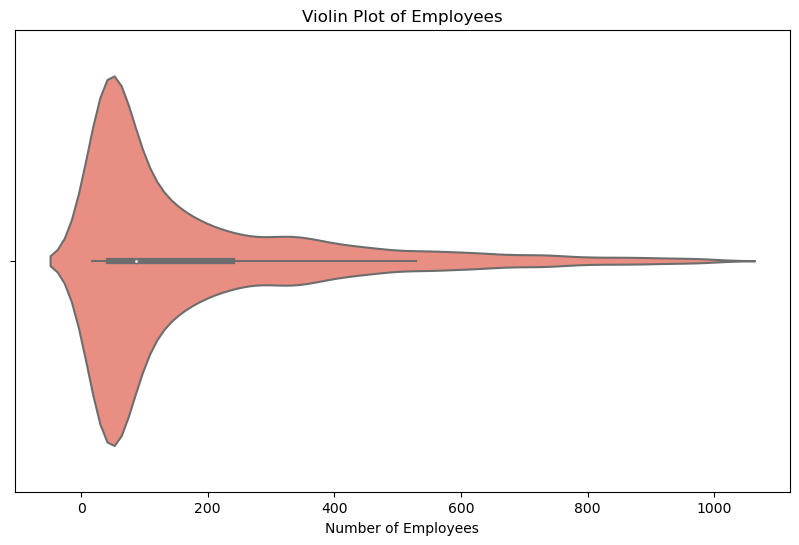

In [96]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Employees'], color='salmon')
plt.title('Violin Plot of Employees')
plt.xlabel('Number of Employees')
plt.show()

### Insights
* The majority of companies have a relatively small number of employees, with the highest count falling within the 0-200 range.

## Histogram with Density Plot of Employee Growth %:

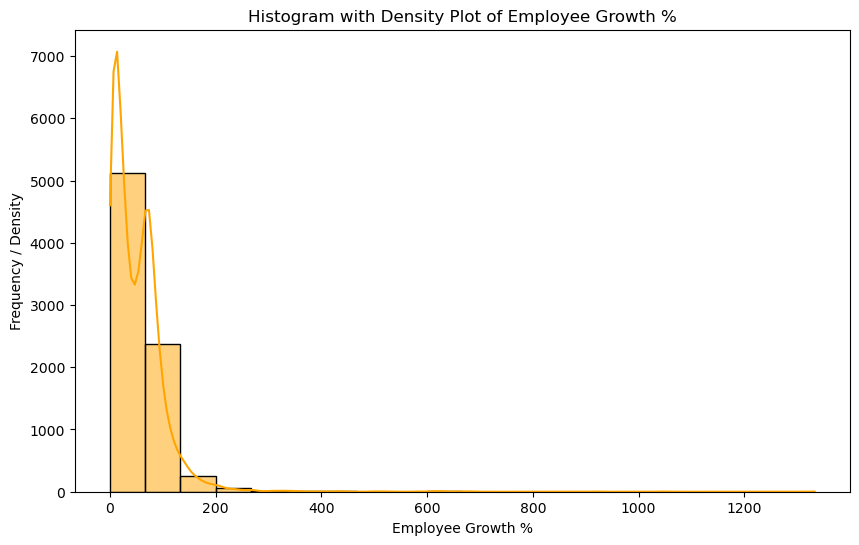

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Emp Growth %'], kde=True, color='orange', bins=20)
plt.title('Histogram with Density Plot of Employee Growth %')
plt.xlabel('Employee Growth %')
plt.ylabel('Frequency / Density')
plt.show()

#### Insights: 
* The distribution of employee growth. How many employees fall into each growth range. 
* You can see that most of the employees have a growth rate between 200 and 600, with a peak around 400.

## Bivariate Analysis


In [23]:
import plotly.express as px

fig = px.sunburst(df, path=['Industry','Country'],title='Industries with respect to Country')
fig.show()

seagreen'#499c9a'
teal '#155453

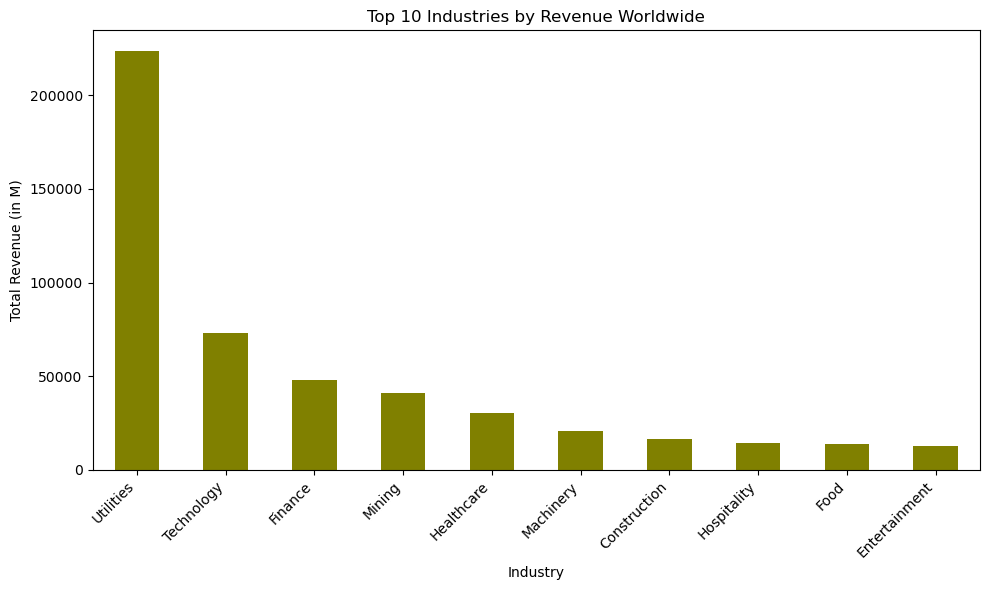

In [99]:
# Group by industry and calculate total revenue
revenue_by_industry_worldwide = df.groupby('Industry')['Revenue in M'].sum()

# Select top 10 industries with highest revenue
top_10_industries_worldwide = revenue_by_industry_worldwide.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_industries_worldwide.plot(kind='bar', color='#302361')
plt.xlabel('Industry')
plt.ylabel('Total Revenue (in M)')
plt.title('Top 10 Industries by Revenue Worldwide')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

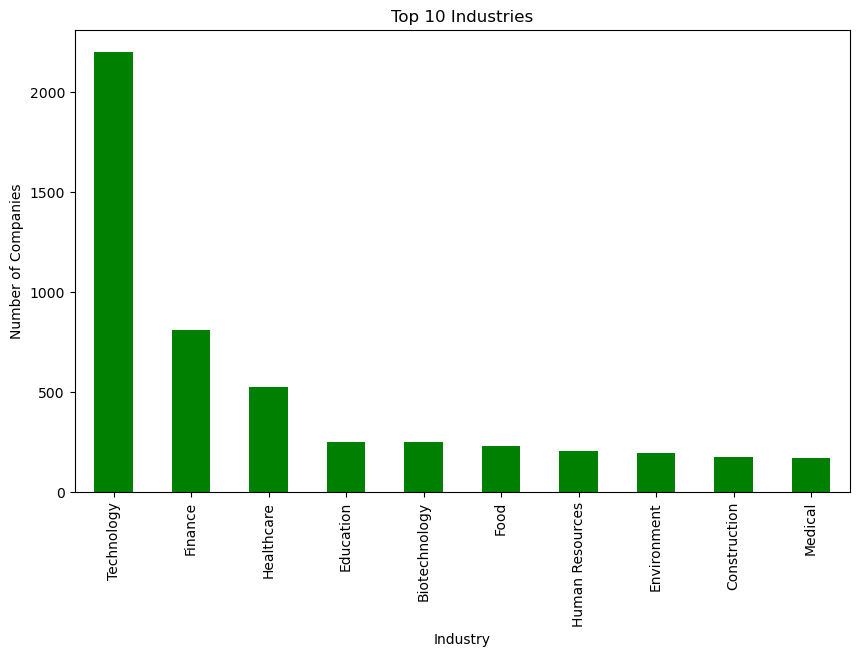

In [100]:
# Bar plot of top industries
plt.figure(figsize=(10, 6))
top_industries = df['Industry'].value_counts().nlargest(10)
top_industries.plot(kind='bar', color='green')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.title('Top 10 Industries')
plt.show()

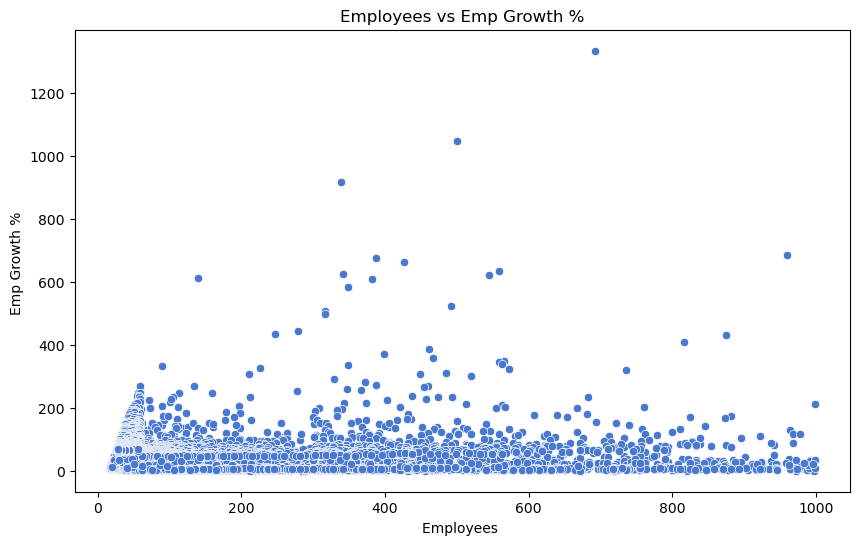

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employees', y='Emp Growth %', data=df)
plt.title('Employees vs Emp Growth %')
plt.xlabel('Employees ')
plt.ylabel('Emp Growth % ')
plt.show()

#### Insights
* There are more employees with lower employee growth rates than there are with higher growth rates.
* The most common employee growth rate is around 400%.

## Heatmap of Correlation:

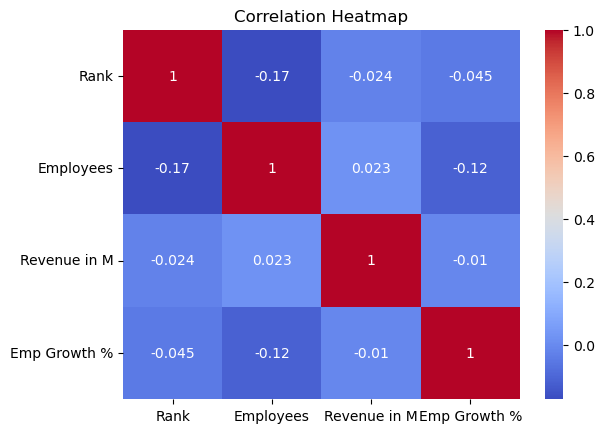

In [102]:
import matplotlib.pyplot as plt
correlation_matrix = df[['Rank', 'Employees', 'Revenue in M', 'Emp Growth %']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Insights: 
* This heatmap will provide a clear view of which numeric variables are strongly correlated (positive or negative) and which are not.

## Indian companies with their cities

In [18]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered around India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Create a MarkerCluster layer for better visualization of multiple markers
marker_cluster = MarkerCluster().add_to(india_map)

# Sample data of Indian companies with their cities
indian_cities = [
    {"City": "Mumbai", "Latitude": 19.0760, "Longitude": 72.8777},
    {"City": "Bangalore", "Latitude": 12.9716, "Longitude": 77.5946},
    {"City": "New Delhi", "Latitude": 28.6139, "Longitude": 77.2090},
    {"City": "Pune", "Latitude": 18.5204, "Longitude": 73.8567},
    {"City": "Noida", "Latitude": 28.5355, "Longitude": 77.3910},
    {"City": "Delhi", "Latitude": 28.7041, "Longitude": 77.1025},
    {"City": "Bengaluru", "Latitude": 12.9716, "Longitude": 77.5946},
    {"City": "Hyderabad", "Latitude": 17.3850, "Longitude": 78.4867},
    {"City": "Ahmedabad", "Latitude": 23.0225, "Longitude": 72.5714},
    {"City": "Chennai", "Latitude": 13.0827, "Longitude": 80.2707}
    # Add more cities here if needed
]

# Add markers for each city
for city in indian_cities:
    folium.Marker(
        location=[city["Latitude"], city["Longitude"]],
        popup=city["City"],
    ).add_to(marker_cluster)

# Save the map to an HTML file
india_map.save("indian_cities_map.html")

# Display the map
india_map

## companies with their countries

In [17]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered around the world
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Create a MarkerCluster layer for better visualization of multiple markers
marker_cluster = MarkerCluster().add_to(world_map)

# Sample data of companies with their countries
countries_data = [
    'USA', 'Canada', 'UAE', 'United Kingdom', 'Cayman Islands', 'Israel', 'Germany', 'Brazil', 'Netherlands',
    'South Korea', 'Egypt', 'Finland', 'Singapore', 'France', 'Nigeria', 'Ireland', 'India', 'China', 'Hong Kong',
    'Cyprus', 'Uzbekistan', 'Sweden', 'Liechtenstein', 'Australia', 'Spain', 'Norway', 'Belgium', 'Chile', 'Poland',
    'Grenada', 'South Africa', 'Guernsey', 'New Zealand', 'Saudi Arabia', 'Denmark', 'Luxembourg', 'Portugal', 'Switzerland',
    'Italy', 'Philippines', 'Argentina', 'Seychelles', 'Austria', 'Indonesia', 'Georgia', 'Belarus'
]

# Country coordinates
country_coordinates = {
    'USA': {'Latitude': 37.0902, 'Longitude': -95.7129},
    'Canada': {'Latitude': 56.1304, 'Longitude': -106.3468},
    'UAE': {'Latitude': 23.4241, 'Longitude': 53.8478},
    'Cayman Islands': {'Latitude': 19.3133, 'Longitude': -81.2546},
    'Israel': {'Latitude': 31.0461, 'Longitude': 34.8516},
    'Germany': {'Latitude': 51.1657, 'Longitude': 10.4515},
    'Brazil': {'Latitude': -14.2350, 'Longitude': -51.9253},
    'Netherlands': {'Latitude': 52.1326, 'Longitude': 5.2913},
    'South Korea': {'Latitude': 35.9078, 'Longitude': 127.7669},
    'Egypt': {'Latitude': 26.8206, 'Longitude': 30.8025},
    'Finland': {'Latitude': 61.9241, 'Longitude': 25.7482},
    'Singapore': {'Latitude': 1.3521, 'Longitude': 103.8198},
    'France': {'Latitude': 46.6034, 'Longitude': 1.8883},
    'Nigeria': {'Latitude': 9.0820, 'Longitude': 8.6753},
    'Ireland': {'Latitude': 53.1424, 'Longitude': -7.6921},
    'India': {'Latitude': 20.5937, 'Longitude': 78.9629},
    'China': {'Latitude': 35.8617, 'Longitude': 104.1954},
    'Hong Kong': {'Latitude': 22.3193, 'Longitude': 114.1694},
    'Cyprus': {'Latitude': 35.1264, 'Longitude': 33.4299},
    'Uzbekistan': {'Latitude': 41.3775, 'Longitude': 64.5853},
    'Sweden': {'Latitude': 60.1282, 'Longitude': 18.6435},
    'Liechtenstein': {'Latitude': 47.1660, 'Longitude': 9.5554},
    'Australia': {'Latitude': -25.2744, 'Longitude': 133.7751},
    'Spain': {'Latitude': 40.4637, 'Longitude': -3.7492},
    'Norway': {'Latitude': 60.4720, 'Longitude': 8.4689},
    'Belgium': {'Latitude': 50.5039, 'Longitude': 4.4699},
    'Chile': {'Latitude': -35.6751, 'Longitude': -71.5430},
    'Poland': {'Latitude': 51.9194, 'Longitude': 19.1451},
    'Grenada': {'Latitude': 12.1165, 'Longitude': -61.6789},
    'South Africa': {'Latitude': -30.5595, 'Longitude': 22.9375},
    'Guernsey': {'Latitude': 49.4657, 'Longitude': -2.5853},
    'New Zealand': {'Latitude': -40.9006, 'Longitude': 174.8860},
    'Saudi Arabia': {'Latitude': 23.8859, 'Longitude': 45.0792},
    'Denmark': {'Latitude': 56.2639, 'Longitude': 9.5018},
    'Luxembourg': {'Latitude': 49.8153, 'Longitude': 6.1296},
    'Portugal': {'Latitude': 39.3999, 'Longitude': -8.2245},
    'Switzerland': {'Latitude': 46.8182, 'Longitude': 8.2275},
    'Italy': {'Latitude': 41.8719, 'Longitude': 12.5674},
    'Philippines': {'Latitude': 12.8797, 'Longitude': 121.7740},
    'Argentina': {'Latitude': -38.4161, 'Longitude': -63.6167},
    'Seychelles': {'Latitude': -4.6796, 'Longitude': 55.4920},
    'Austria': {'Latitude': 47.5162, 'Longitude': 14.5501},
    'Indonesia': {'Latitude': -0.7893, 'Longitude': 113.9213},
    'Georgia': {'Latitude': 42.3154, 'Longitude': 43.3569},
    'Belarus': {'Latitude': 53.7098, 'Longitude': 27.9534}
}

# Add markers for each country
for country in countries_data:
    if country in country_coordinates:
        folium.Marker(
            location=[country_coordinates[country]['Latitude'], country_coordinates[country]['Longitude']],
            popup=country,
        ).add_to(marker_cluster)

# Save the map to an HTML file
world_map.save("companies_by_country_map.html")

# Display the map
world_map

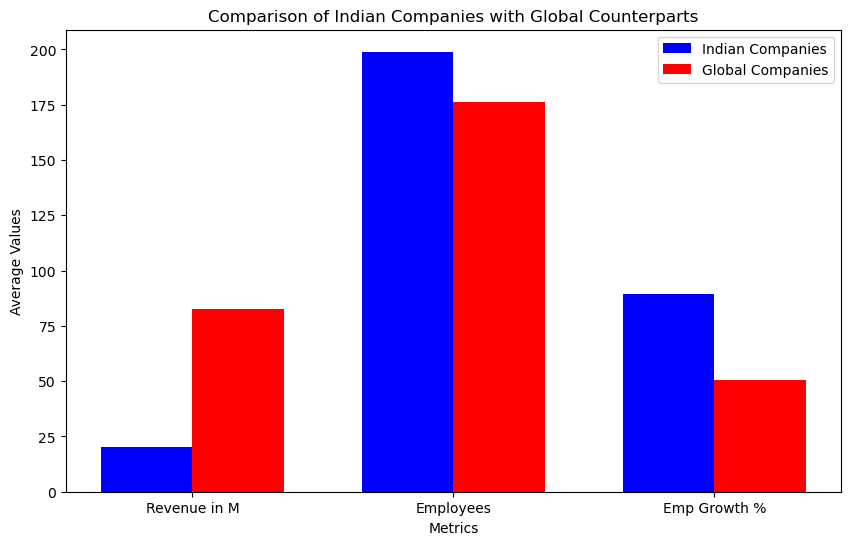

In [105]:
import matplotlib.pyplot as plt

# Filter Indian companies
indian_companies = df[df['Country'] == 'India']

# Filter global companies
global_companies = df[df['Country'] != 'India']

# Calculate mean metrics for Indian and global companies
indian_metrics = indian_companies[['Revenue in M', 'Employees', 'Emp Growth %']].mean()
global_metrics = global_companies[['Revenue in M', 'Employees', 'Emp Growth %']].mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(indian_metrics))

# Plotting bars for Indian companies
bar1 = ax.bar(index, indian_metrics, bar_width, label='Indian Companies', color='b')

# Plotting bars for global companies
bar2 = ax.bar([i + bar_width for i in index], global_metrics, bar_width, label='Global Companies', color='r')

# Adding labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Average Values')
ax.set_title('Comparison of Indian Companies with Global Counterparts')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(indian_metrics.index)
ax.legend()

plt.show()

### Insights
* Indian companies excel in employee growth percentage, while global counterparts dominate in revenue and employee count.

# Multivariate Analysis

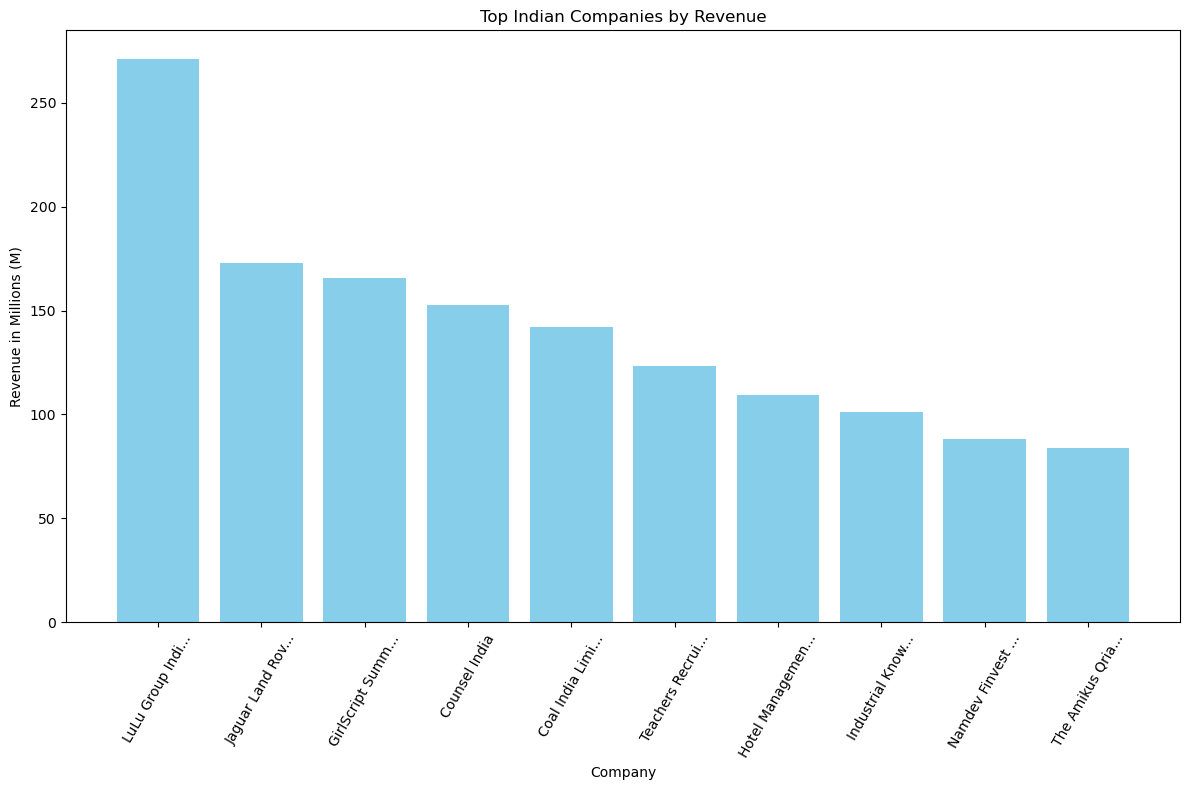

In [106]:
# Filter the dataframe for Indian companies
indian_companies = df[df['Country'] == 'India']

# Sort the Indian companies by revenue in descending order
top_indian_companies = indian_companies.sort_values(by='Revenue in M', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_indian_companies['Company'], top_indian_companies['Revenue in M'], color='skyblue')
plt.xlabel('Company')
plt.ylabel('Revenue in Millions (M)')
plt.title('Top Indian Companies by Revenue')
plt.xticks(rotation=60, ha='center')  # Rotate x-axis labels vertically for full display
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()

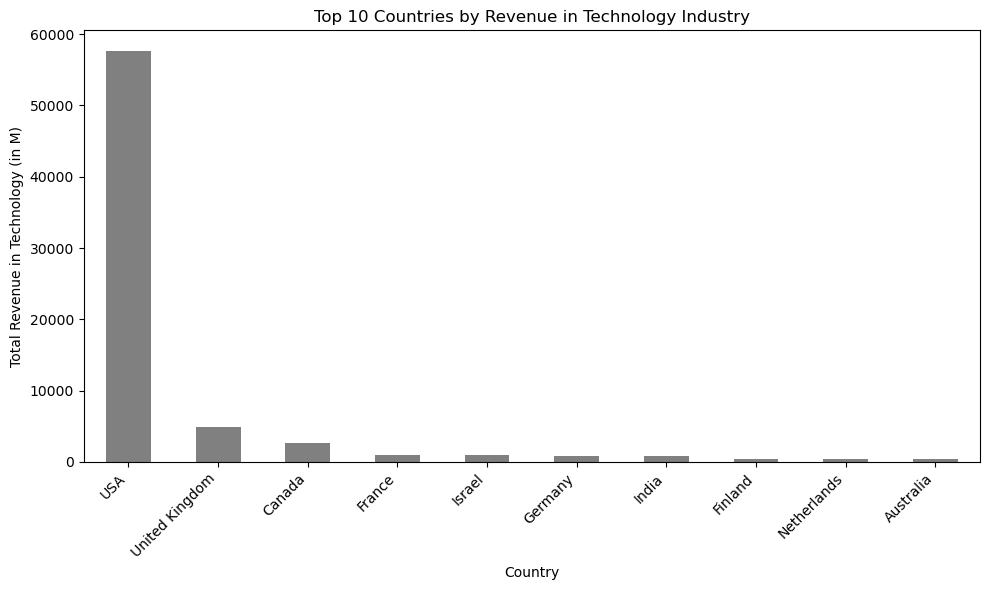

In [107]:
# Filter data for companies in the technology industry
tech_df = df[df['Industry'] == 'Technology']

# Group by country and calculate total revenue
revenue_by_country_tech = tech_df.groupby('Country')['Revenue in M'].sum()

# Select top 10 countries with highest revenue in technology
top_10_countries_tech = revenue_by_country_tech.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_countries_tech.plot(kind='bar', color='grey')
plt.xlabel('Country')
plt.ylabel('Total Revenue in Technology (in M)')
plt.title('Top 10 Countries by Revenue in Technology Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

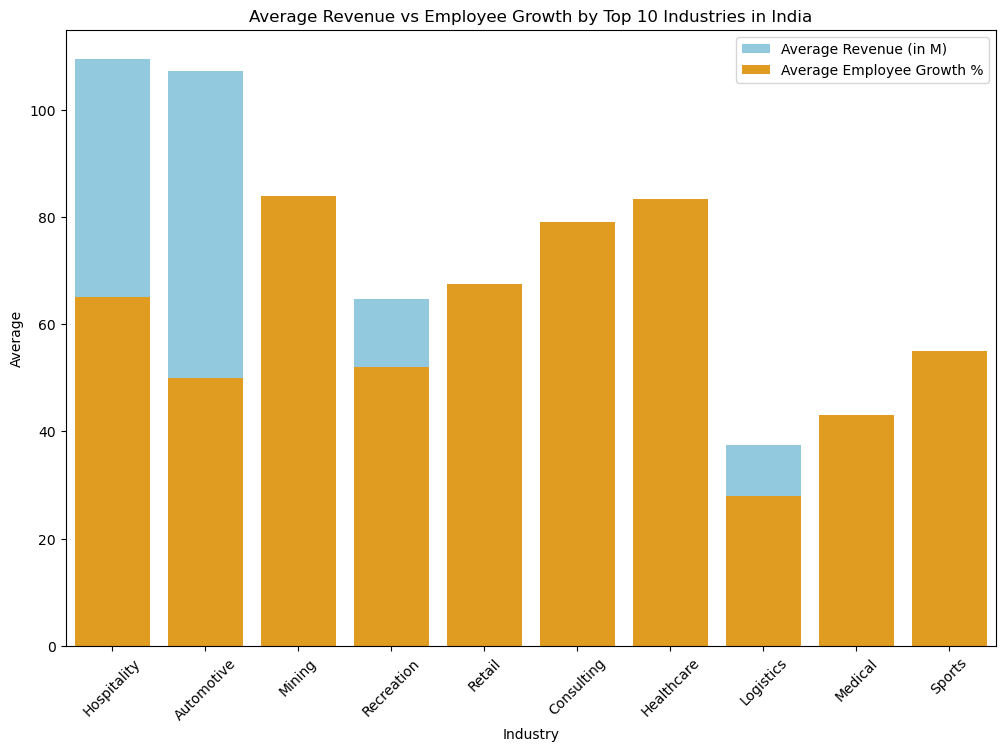

In [108]:
# Filter DataFrame for Indian companies
indian_companies = df[df['Country'] == 'India']

# Calculate average revenue and employee growth percentage for each industry
industry_stats = indian_companies.groupby('Industry').agg({'Revenue in M': 'mean', 'Emp Growth %': 'mean'}).reset_index()

# Sort industries based on average revenue
industry_stats = industry_stats.sort_values(by='Revenue in M', ascending=False).head(10)

# Create grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Industry', y='Revenue in M', data=industry_stats, color='skyblue', label='Average Revenue (in M)')
sns.barplot(x='Industry', y='Emp Growth %', data=industry_stats, color='orange', label='Average Employee Growth %')
plt.xlabel('Industry')
plt.ylabel('Average')
plt.title('Average Revenue vs Employee Growth by Top 10 Industries in India')
plt.xticks(rotation=45)
plt.legend()
plt.show()

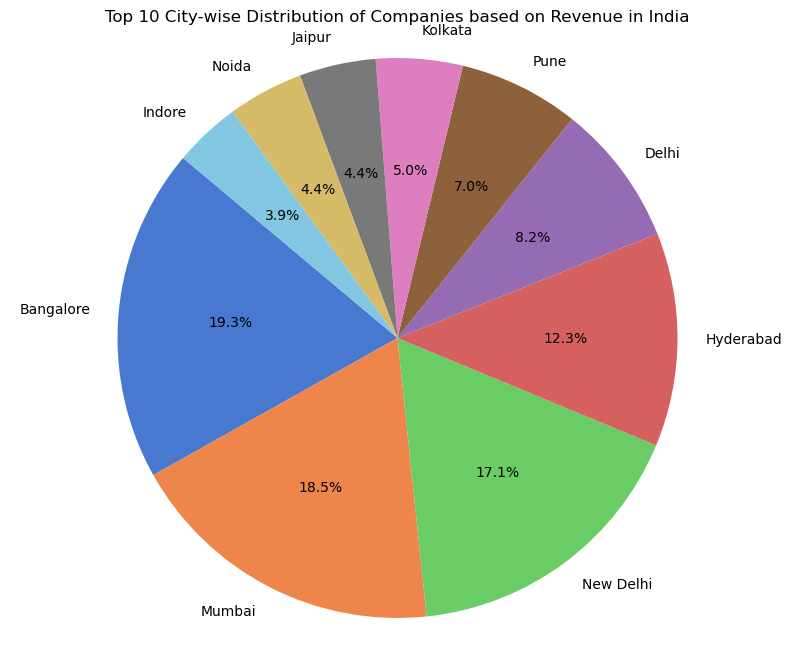

In [109]:
# Filter the DataFrame to include only Indian companies
indian_companies = df[df['Country'] == 'India']

# Calculate total revenue generated by companies in each city
city_revenue = indian_companies.groupby('City')['Revenue in M'].sum().reset_index()

# Sort cities by total revenue and take the top 10
top_10_cities = city_revenue.nlargest(10, 'Revenue in M')

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10_cities['Revenue in M'], labels=top_10_cities['City'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 City-wise Distribution of Companies based on Revenue in India')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

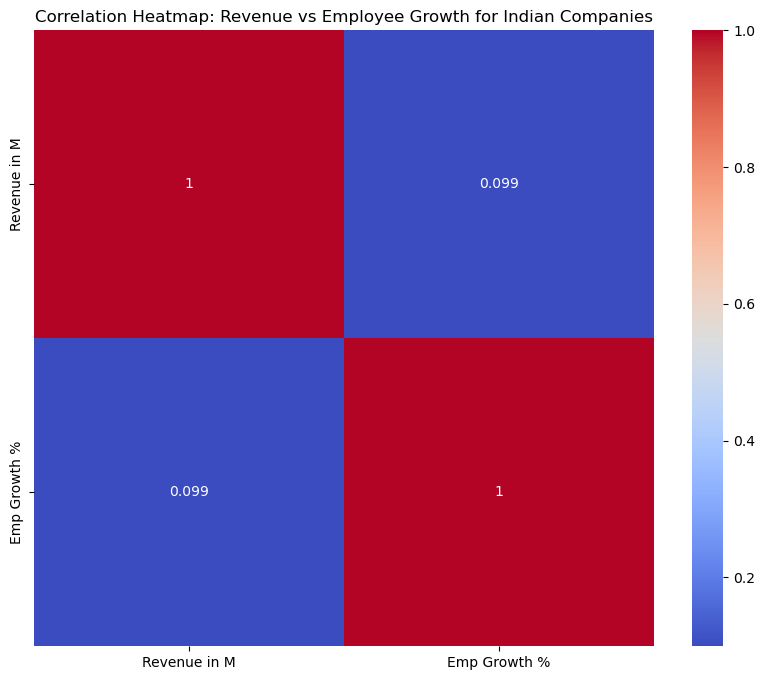

In [110]:
# Filter the DataFrame to include only Indian companies
indian_companies = df[df['Country'] == 'India']

# Create a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = indian_companies[['Revenue in M', 'Emp Growth %']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Revenue vs Employee Growth for Indian Companies')
plt.show()

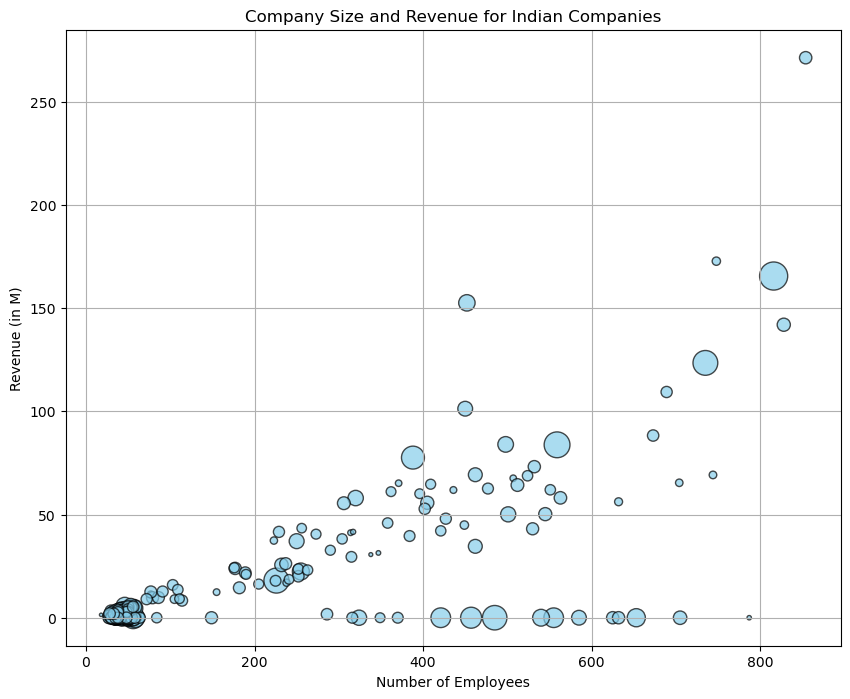

In [111]:
# Filter the DataFrame to include only Indian companies
indian_companies = df[df['Country'] == 'India']

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(indian_companies['Employees'], indian_companies['Revenue in M'], s=indian_companies['Emp Growth %'], alpha=0.7, c='skyblue', edgecolors='black')
plt.title('Company Size and Revenue for Indian Companies')
plt.xlabel('Number of Employees')
plt.ylabel('Revenue (in M)')
plt.grid(True)
plt.show()

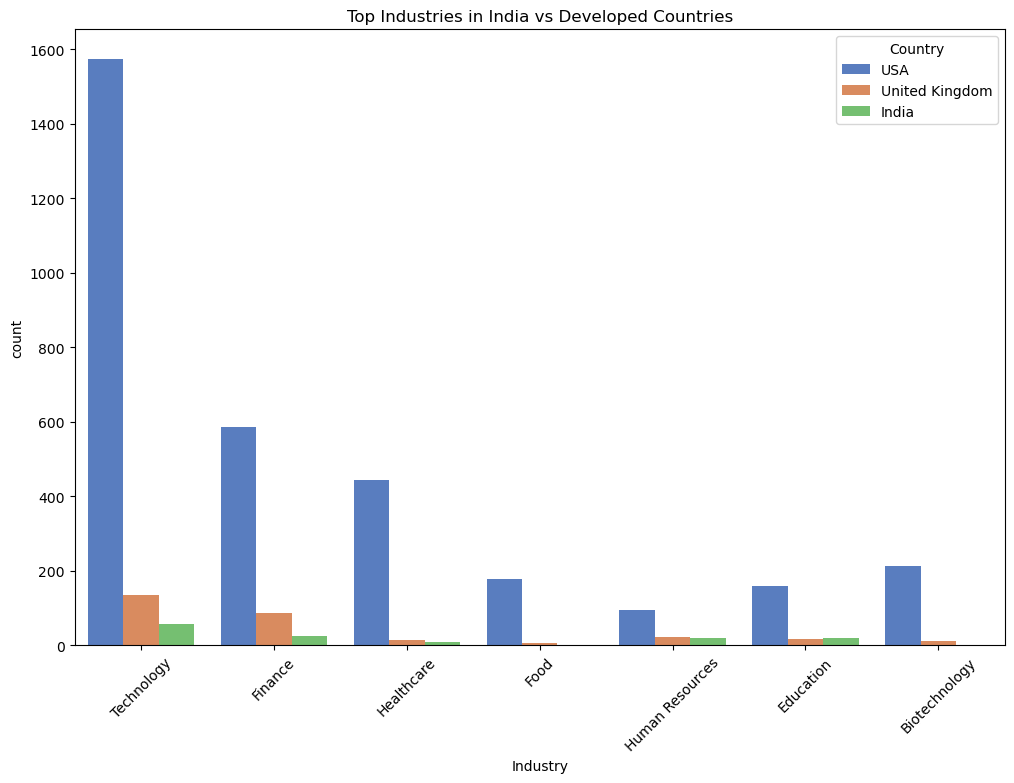

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for India and developed countries
filtered_data = df[df['Country'].isin(['India', 'USA', 'United Kingdom'])]

# Get top industries in India
top_industries_india = filtered_data[filtered_data['Country'] == 'India']['Industry'].value_counts().head(5).index.tolist()

# Get top industries in USA
top_industries_usa = filtered_data[filtered_data['Country'] == 'USA']['Industry'].value_counts().head(5).index.tolist()

# Get top industries in United Kingdom
top_industries_uk = filtered_data[filtered_data['Country'] == 'United Kingdom']['Industry'].value_counts().head(5).index.tolist()

# Concatenate all top industries
top_industries = top_industries_india + top_industries_usa + top_industries_uk

# Filter data for top industries
filtered_data = filtered_data[filtered_data['Industry'].isin(top_industries)]

# Create stacked bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, x='Industry', hue='Country')
plt.title('Top Industries in India vs Developed Countries')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()


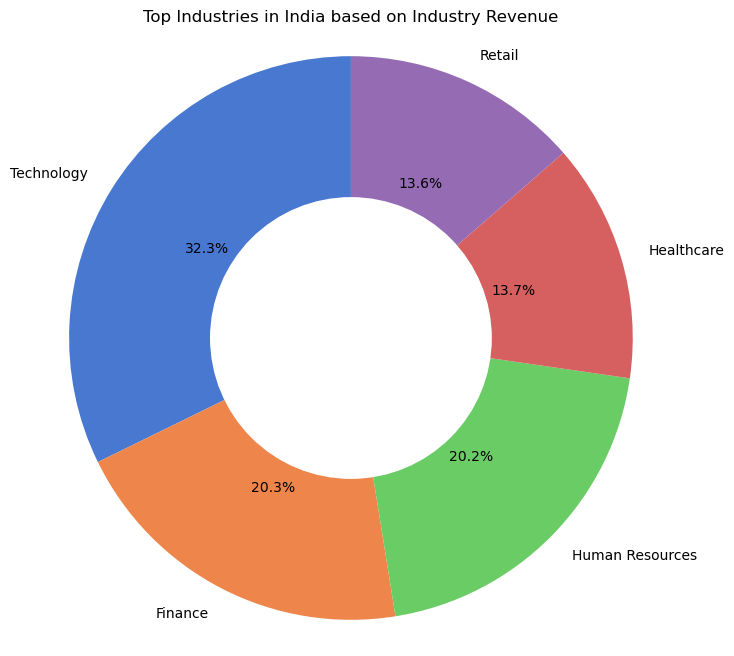

In [125]:
import matplotlib.pyplot as plt

# Filter data for India
data_india = df[df['Country'] == 'India']

# Calculate revenue for each industry
revenue_by_industry_india = data_india.groupby('Industry')['Revenue in M'].sum().sort_values(ascending=False)

# Get top industries and their revenue
top_industries_india = revenue_by_industry_india.head(5)
top_industries_names_india = top_industries_india.index
top_industries_revenue_india = top_industries_india.values

# Plot donut chart
plt.figure(figsize=(8, 8))
plt.pie(top_industries_revenue_india, labels=top_industries_names_india, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top Industries in India based on Industry Revenue')
plt.axis('equal')  
plt.show()


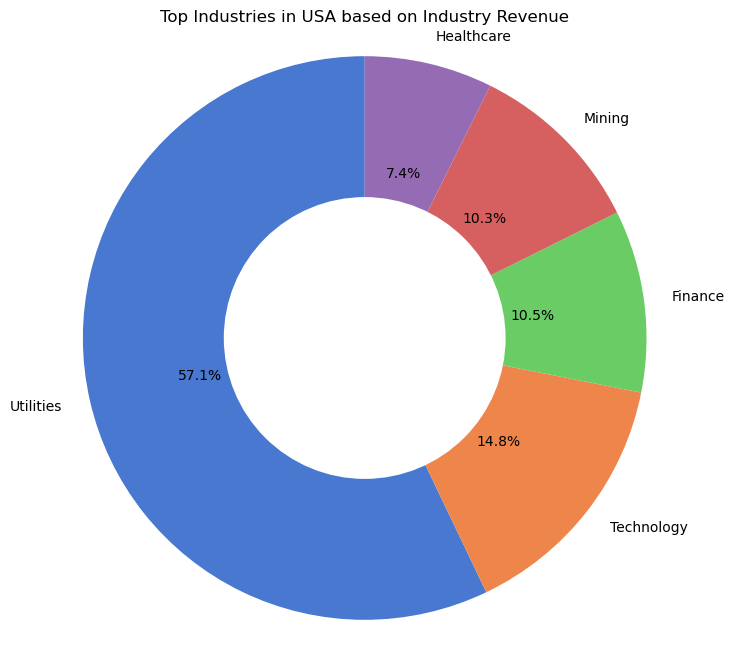

In [126]:
# Filter data for USA
data_usa = df[df['Country'] == 'USA']

# Calculate revenue for each industry
revenue_by_industry_usa = data_usa.groupby('Industry')['Revenue in M'].sum().sort_values(ascending=False)

# Get top industries and their revenue
top_industries_usa = revenue_by_industry_usa.head(5)
top_industries_names_usa = top_industries_usa.index
top_industries_revenue_usa = top_industries_usa.values

# Plot donut chart
plt.figure(figsize=(8, 8))
plt.pie(top_industries_revenue_usa, labels=top_industries_names_usa, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top Industries in USA based on Industry Revenue')
plt.axis('equal')  
plt.show()


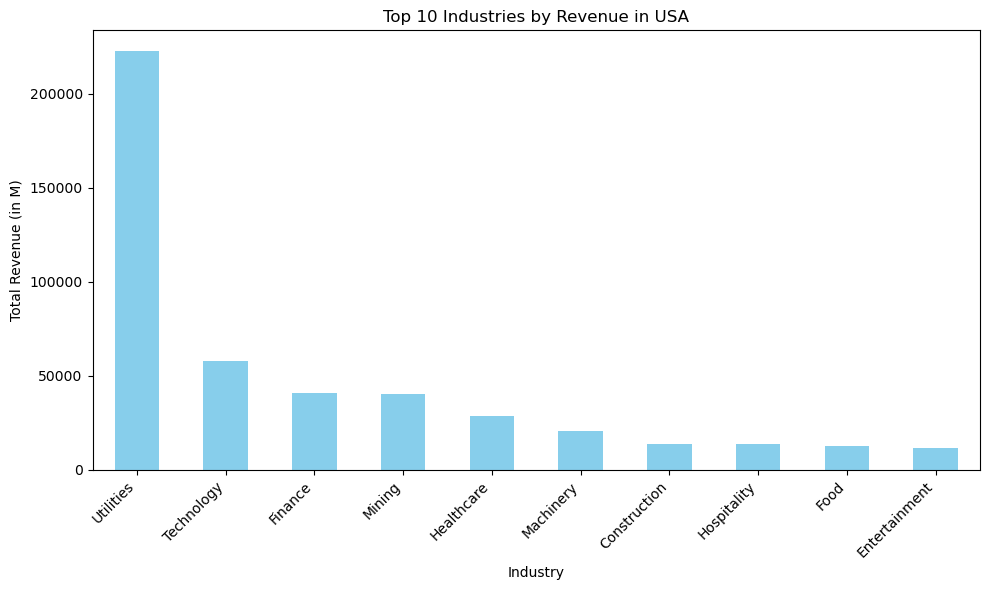

In [127]:
# Filter data for companies in India
df_india = df[df['Country'] == 'USA']

# Group by industry and calculate total revenue
revenue_by_industry = df_india.groupby('Industry')['Revenue in M'].sum()

# Select top 10 industries with highest revenue
top_10_industries = revenue_by_industry.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_industries.plot(kind='bar', color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Total Revenue (in M)')
plt.title('Top 10 Industries by Revenue in USA')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

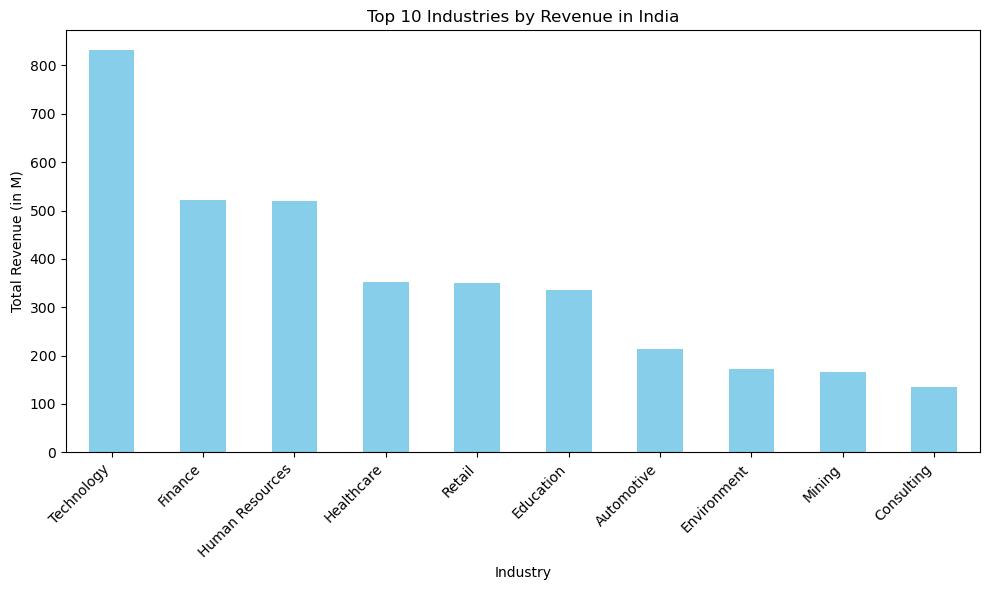

In [128]:
import matplotlib.pyplot as plt

# Filter data for companies in India
df_india = df[df['Country'] == 'India']

# Group by industry and calculate total revenue
revenue_by_industry = df_india.groupby('Industry')['Revenue in M'].sum()

# Select top 10 industries with highest revenue
top_10_industries = revenue_by_industry.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_industries.plot(kind='bar', color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Total Revenue (in M)')
plt.title('Top 10 Industries by Revenue in India')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

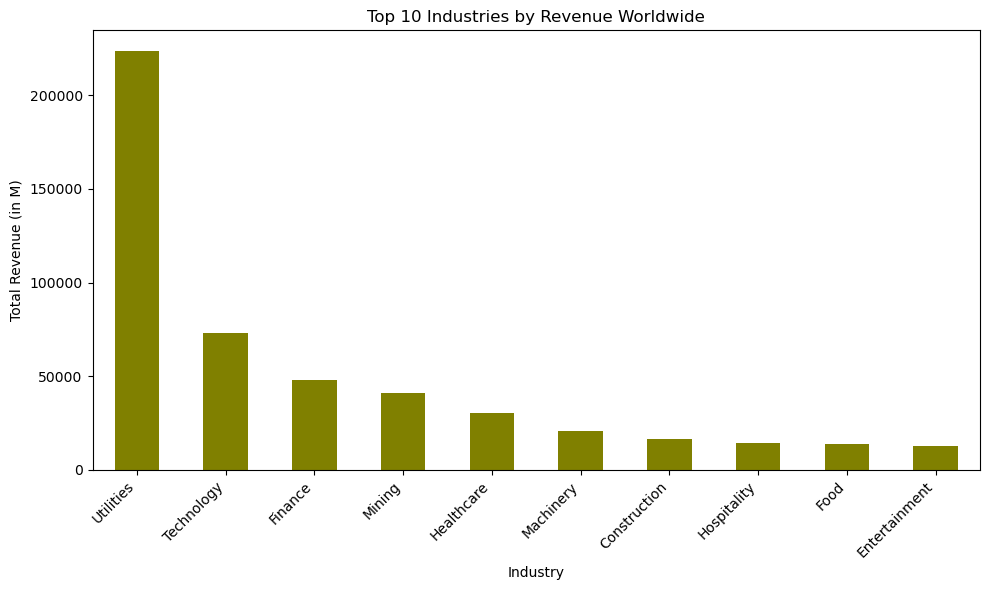

In [129]:
# Group by industry and calculate total revenue
revenue_by_industry_worldwide = df.groupby('Industry')['Revenue in M'].sum()

# Select top 10 industries with highest revenue
top_10_industries_worldwide = revenue_by_industry_worldwide.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_industries_worldwide.plot(kind='bar', color='OLIVE')
plt.xlabel('Industry')
plt.ylabel('Total Revenue (in M)')
plt.title('Top 10 Industries by Revenue Worldwide')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

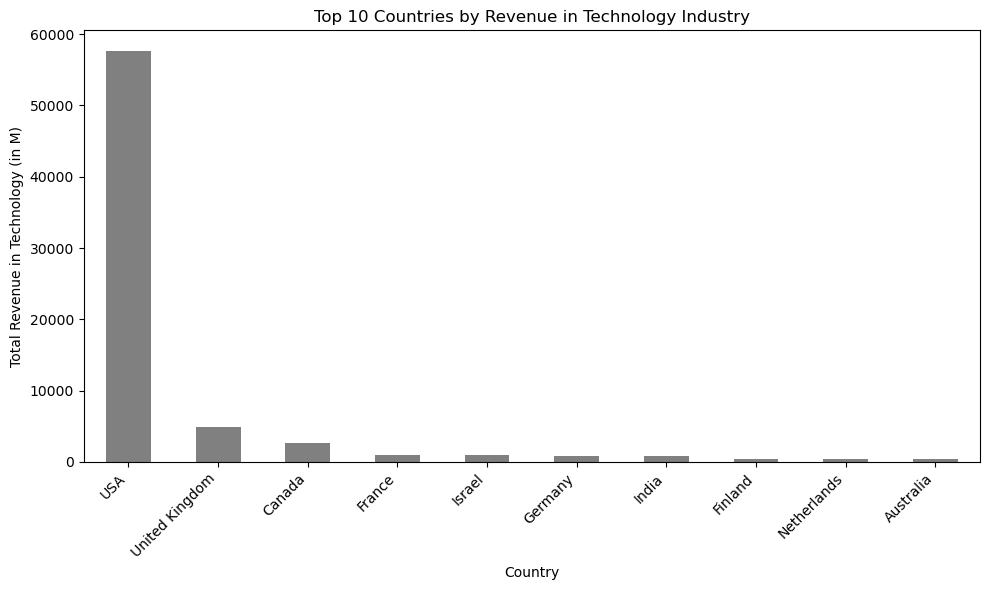

In [130]:
# Filter data for companies in the technology industry
tech_df = df[df['Industry'] == 'Technology']

# Group by country and calculate total revenue
revenue_by_country_tech = tech_df.groupby('Country')['Revenue in M'].sum()

# Select top 10 countries with highest revenue in technology
top_10_countries_tech = revenue_by_country_tech.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_countries_tech.plot(kind='bar', color='grey')
plt.xlabel('Country')
plt.ylabel('Total Revenue in Technology (in M)')
plt.title('Top 10 Countries by Revenue in Technology Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [134]:
df

,Rank,Company,City,Country,Industry,Employees,Revenue in M,Emp Growth %
0,1,Anthropic,San Francisco,USA,Technology,573,721.9,323.0
1,2,Figure,Silicon Valley,USA,Technology,692,28.0,1333.0
2,3,CoreWeave,New York City,USA,Technology,343,641.0,214.0
3,4,Hugging Face,New York City,USA,Technology,333,85.2,42.0
4,5,Shield AI,San Diego,USA,Technology,645,251.7,12.0
...,...,...,...,...,...,...,...,...
7845,9995,University of T...,Oak Ridge,USA,Research,28,0.0,65.0
7846,9997,reteach,Berlin,Germany,Education,28,0.0,63.0
7847,9998,Syntricate Tech...,Boston,USA,Technology,28,2.8,69.0
7848,9999,ExcelHealth Gro...,Nashville,USA,Healthcare,28,0.0,65.0


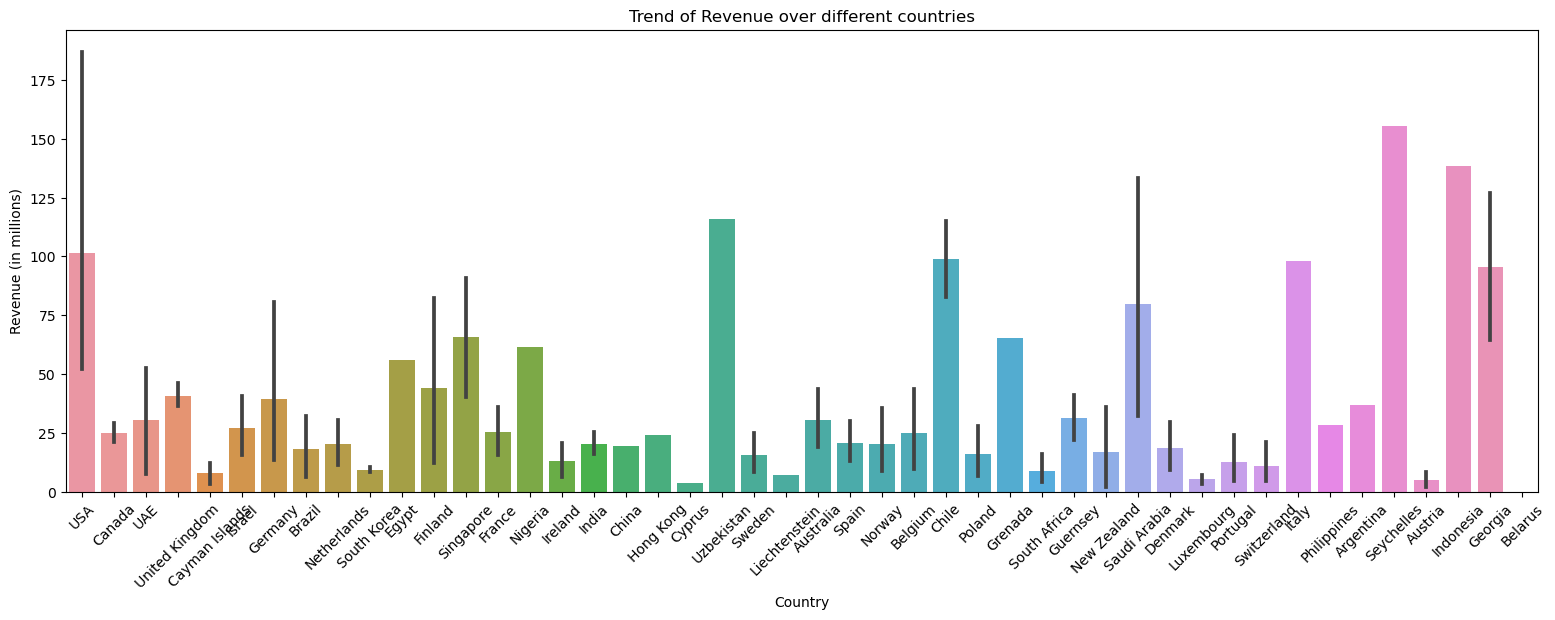

In [137]:
top_industrie = df['Country']
plt.figure(figsize=(19, 6))
sns.barplot(data=df, x='Country', y='Revenue in M')
plt.title('Trend of Revenue over different countries')
plt.xlabel('Country')
plt.ylabel('Revenue (in millions)')
plt.xticks(rotation=45)
plt.show()

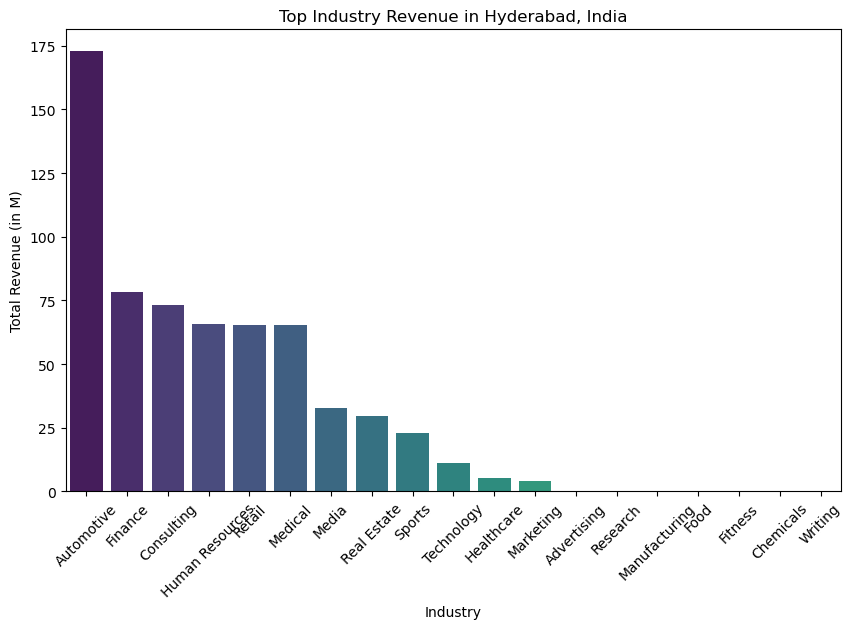

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Hyderabad, India
data_hyderabad = df[(df['City'] == 'Mumbai') & (df['Country'] == 'India')]

# Group by industry and calculate total revenue
revenue_by_industry_hyderabad = data_hyderabad.groupby('Industry')['Revenue in M'].sum().sort_values(ascending=False)

# Plot top industries and their revenues
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_industry_hyderabad.index, y=revenue_by_industry_hyderabad.values, palette='viridis')
plt.title('Top Industry Revenue in Hyderabad, India')
plt.xlabel('Industry')
plt.ylabel('Total Revenue (in M)')
plt.xticks(rotation=45)
plt.show()

